In [2]:
# Import relevant libraries.
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from datetime import datetime

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('words')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [32]:
#df_uk = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\CleanedDataUK.xlsx')

url = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/CleanedDataUK.xlsx'
df_uk = pd.read_excel(url)  # Works similarly for CSV

df_uk

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,"Thank you, Chairman. I'm actually very pleased..."
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,It's a great pleasure to be here in the beauti...
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,Few industries have suffered more from volatil...
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,My topic this evening is the use of forecasts ...
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,"Six years ago this week, sterling left the exc..."
...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,Dimitri Demekas and Paul Tucker for helpful di...
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,Copies of publications are available from: Thi...
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,Elisabeth Stheeman notes that climate change a...
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,"These are divided into seven categories, suffr..."


**Remove URLs, hashtags, special characters, stopwords from the speeches**

In [4]:
# Prepare stopwords, excluding 'not'
stop_words = set(stopwords.words('english')) - {'not'}

# Apply all preprocessing steps 
df_uk['Text'] = (
    df_uk['Text']
    .astype(str)  # Ensure all values are strings
    #.apply(contractions.fix)  # Expand contractions
    .str.replace(r'http\S+', '', regex=True)  # Remove URLs
    .str.replace('#', '', regex=False)  # Remove hashtags
    .str.replace(r'\W', ' ', regex=True)  # Remove special characters
    .str.lower()  # Convert to lowercase
    .apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))  # Remove stopwords (except 'not')
)
df_uk

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
0,r980915a_BOE,United Kingdom,1998-09-15,1998,September,Speech,George,Yes,thank chairman actually pleased opportunity re...
1,r981021b_BOE,United Kingdom,1998-10-21,1998,October,Britain in Europe,George,Yes,great pleasure beautiful city bruges honoured ...
2,r981021a_BOE,United Kingdom,1998-10-21,1998,October,Impact of the recent turbulence in internation...,King,No,industries suffered volatility british economy...
3,r981101a_BOE,United Kingdom,1998-11-01,1998,November,"Economic policy, with and without forecasts",Budd,No,topic evening use forecasts economic policy ma...
4,r981101b_BOE,United Kingdom,1998-11-01,1998,November,Inflation targeting in practice: the UK experi...,Vickers,No,six years ago week sterling left exchange rate...
...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...


In [5]:
# Filter the data for years between 2020 and 2022
filtered_df_year = df_uk[(df_uk['Year'] >= 2020) & (df_uk['Year'] <= 2022)]
filtered_df_year 

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text
1042,r200123a_BOE,United Kingdom,2020-01-23,2020,January,Responding to leaps in payments: from unbundli...,Knowles,No,good morning would like thank westminster busi...
1043,r200205a_BOE,United Kingdom,2020-02-05,2020,February,Stress tests: a policymaker’s perspective,Kohn,No,simultaneous transparent bank stress tests one...
1044,r200211b_BOE,United Kingdom,2020-02-11,2020,February,Governance of financial globalisation,Cunliffe,No,jon cunliffe sets progress made challenges fac...
1045,r200211a_BOE,United Kingdom,2020-02-11,2020,February,Monetary policy in the intangible economy,Haskel,No,grateful marco garofalo jamie lenney invaluabl...
1046,r200930a_BOE,United Kingdom,2020-09-30,2020,September,Avoiding economic anxiety,Haldane,No,views expressed not necessarily bank england m...
...,...,...,...,...,...,...,...,...,...
1204,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...
1205,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...
1206,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...
1207,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...


In [33]:
# Read the bank rate file and create the data frame
#df_bank_rates = pd.read_excel('C:\\Users\\elif.ozkol\\Desktop\\LSE Project\\bank_rates_years_months-2.xlsx')
#https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/bank_rates_years_months-2.xlsx
#df_bank_rates = pd.read_csv(r'C:\Users\elif.ozkol\Desktop\LSE Project\bank_rates_years_months.xlsx')

url_bank_rates = 'https://github.com/gamzebb/group-project/raw/refs/heads/main/cleaned_economic_data/bank_rates_years_months-2.xlsx'
df_bank_rates = pd.read_excel(url_bank_rates)  # Works similarly for CSV

df_bank_rates

,BankRate,Year,Month
0,6.50,1997,June
1,6.75,1997,July
2,7.00,1997,August
3,7.00,1997,September
4,7.00,1997,October
...,...,...,...
310,5.00,2024,September
311,4.75,2024,November
312,4.75,2024,December
313,4.50,2025,February


In [7]:
# Add year and month name
##df_bank_rates['Year'] = df_bank_rates['Date'].dt.year
##df_bank_rates['Month'] = df_bank_rates['Date'].dt.month_name()

##df_bank_rates


In [8]:
# Filter bank rates for only 2020-2022
filtered_df_bank_rates = df_bank_rates[(df_bank_rates['Year'] >= 2020) & (df_bank_rates['Year'] <= 2022)]
filtered_df_bank_rates

,BankRate,Year,Month
259,0.75,2020,January
260,0.75,2020,February
261,0.25,2020,March
262,0.10,2020,March
263,0.10,2020,March
264,0.10,2020,April
265,0.10,2020,May
266,0.10,2020,June
267,0.10,2020,July
268,0.10,2020,August


In [9]:
filtered_df_year.loc[:, 'Month'] = filtered_df_year['Month'].astype(str)
filtered_df_bank_rates.loc[:, 'Month'] = filtered_df_bank_rates['Month'].astype(str)


In [10]:
monthly_rates = (
    filtered_df_bank_rates
    .groupby(['Year', 'Month'], as_index=False)
    .agg({'BankRate': 'last'})
)

df_merged_by_month = filtered_df_year.merge(
    monthly_rates,
    on=['Year', 'Month'],
    how='left'
).rename(columns={'BankRate': 'Rate'})


In [11]:
df_merged_by_month

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Rate
0,r200123a_BOE,United Kingdom,2020-01-23,2020,January,Responding to leaps in payments: from unbundli...,Knowles,No,good morning would like thank westminster busi...,0.75
1,r200205a_BOE,United Kingdom,2020-02-05,2020,February,Stress tests: a policymaker’s perspective,Kohn,No,simultaneous transparent bank stress tests one...,0.75
2,r200211b_BOE,United Kingdom,2020-02-11,2020,February,Governance of financial globalisation,Cunliffe,No,jon cunliffe sets progress made challenges fac...,0.75
3,r200211a_BOE,United Kingdom,2020-02-11,2020,February,Monetary policy in the intangible economy,Haskel,No,grateful marco garofalo jamie lenney invaluabl...,0.75
4,r200930a_BOE,United Kingdom,2020-09-30,2020,September,Avoiding economic anxiety,Haldane,No,views expressed not necessarily bank england m...,0.10
...,...,...,...,...,...,...,...,...,...,...
162,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...,0.75
163,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...,0.75
164,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...,1.00
165,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...,2.25


**Finbert Sentiment Analysis**

In [12]:
# Import all the necessary packages.
#!pip install transformers
#!pip install torch torchvision torchaudio

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import transformers
import nltk
nltk.download('punkt')

from transformers import BertTokenizer, BertForSequenceClassification

print(transformers.__version__)
print(torch.__version__)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\elif.ozkol\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


4.51.3
2.7.0+cpu


In [13]:
tokenizer = BertTokenizer.from_pretrained('yiyanghkust/finbert-tone')
model = BertForSequenceClassification.from_pretrained('yiyanghkust/finbert-tone')
model.eval()  # Set model to evaluation mode

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30873, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [14]:
print("FinBERT labels:", model.config.id2label)
# Should print: {0: 'Neutral', 1: 'Positive', 2: 'Negative'}


FinBERT labels: {0: 'Neutral', 1: 'Positive', 2: 'Negative'}


In [15]:
def chunk_text(text, max_length=510):
    sentences = sent_tokenize(text)
    current_chunk = []
    chunks = []

    for sentence in sentences:
        current_chunk.append(sentence)
        tokenized = tokenizer(" ".join(current_chunk), return_tensors="pt", truncation=False)
        if tokenized['input_ids'].shape[1] > max_length:
            current_chunk.pop()
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
    if current_chunk:
        chunks.append(" ".join(current_chunk))

    return chunks

In [16]:
def analyse_sentiment(text):
    chunks = chunk_text(text)
    sentiments = []

    for chunk in chunks:
        inputs = tokenizer(chunk, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
        probs = torch.nn.functional.softmax(outputs.logits, dim=-1).detach().numpy()[0]
        sentiments.append(probs)

    avg_sentiments = np.mean(sentiments, axis=0)
    sentiment_series = pd.Series({
        'neutral_finbert': avg_sentiments[0],
        'positive_finbert': avg_sentiments[1],
        'negative_finbert': avg_sentiments[2],
        'polarity_score_finbert': avg_sentiments[1] - avg_sentiments[2]
    })
    return sentiment_series

In [17]:
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
#nltk.download('punkt')

tqdm.pandas()  # Enable progress bar
finbert_results = df_merged_by_month['Text'].progress_apply(lambda x: analyse_sentiment(str(x)))
df_merged_by_month = pd.concat([df_merged_by_month.reset_index(drop=True), finbert_results], axis=1)

100%|████████████████████████████████████████████████████████████████████████████████| 167/167 [02:44<00:00,  1.01it/s]


In [18]:
df_merged_by_month

,Reference,Country,Date,Year,Month,Title,Author,IsGov,Text,Rate,neutral_finbert,positive_finbert,negative_finbert,polarity_score_finbert
0,r200123a_BOE,United Kingdom,2020-01-23,2020,January,Responding to leaps in payments: from unbundli...,Knowles,No,good morning would like thank westminster busi...,0.75,0.915931,0.077887,0.006182,0.071706
1,r200205a_BOE,United Kingdom,2020-02-05,2020,February,Stress tests: a policymaker’s perspective,Kohn,No,simultaneous transparent bank stress tests one...,0.75,0.939940,0.049462,0.010598,0.038864
2,r200211b_BOE,United Kingdom,2020-02-11,2020,February,Governance of financial globalisation,Cunliffe,No,jon cunliffe sets progress made challenges fac...,0.75,0.782458,0.215587,0.001954,0.213633
3,r200211a_BOE,United Kingdom,2020-02-11,2020,February,Monetary policy in the intangible economy,Haskel,No,grateful marco garofalo jamie lenney invaluabl...,0.75,0.979114,0.015519,0.005367,0.010153
4,r200930a_BOE,United Kingdom,2020-09-30,2020,September,Avoiding economic anxiety,Haldane,No,views expressed not necessarily bank england m...,0.10,0.884688,0.052770,0.062542,-0.009772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,r220428a_BOE,United Kingdom,2022-04-28,2022,April,Macropru,Breeden,No,dimitri demekas paul tucker helpful discussion...,0.75,0.790335,0.163924,0.045742,0.118182
163,r220426a_BOE,United Kingdom,2022-04-26,2022,April,Bufferati,Woods,No,copies publications available publication avai...,0.75,0.483925,0.515084,0.000991,0.514093
164,r220503a_BOE,United Kingdom,2022-05-03,2022,May,Why macroprudential policy needs to tackle fin...,Stheeman,No,elisabeth stheeman notes climate change transi...,1.00,0.867319,0.018150,0.114531,-0.096382
165,r221019a_BOE,United Kingdom,2022-10-19,2022,October,"Governance of “Decentralised” Finance: Get up,...",Wilkins,No,divided seven categories suffrage systems whos...,2.25,0.983664,0.015353,0.000983,0.014370


**Analyze Correlation**

In [19]:
correlation = df_merged_by_month['Rate'].corr(df_merged_by_month['polarity_score_finbert'])
print(f"Correlation between rate and FinBERT polarity: {correlation:.4f}")


Correlation between rate and FinBERT polarity: -0.1664


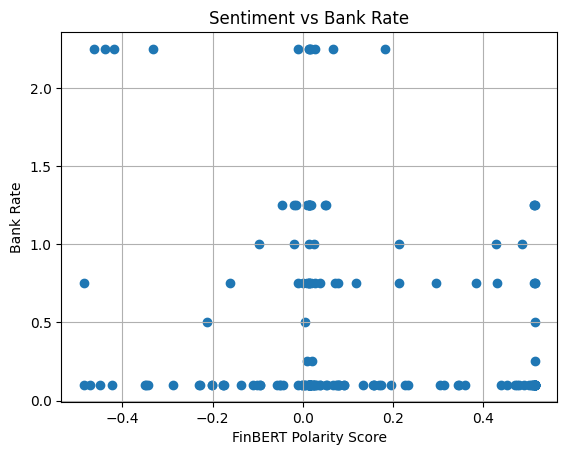

In [20]:
import matplotlib.pyplot as plt

plt.scatter(df_merged_by_month['polarity_score_finbert'], df_merged_by_month['Rate'])
plt.xlabel("FinBERT Polarity Score")
plt.ylabel("Bank Rate")
plt.title("Sentiment vs Bank Rate")
plt.grid(True)
plt.show()

 Observations:
 
Wide Spread Around 0 Sentiment:

Most speeches cluster around neutral polarity (~0).

Bank rates at neutral sentiment still vary widely from 0% to over 2% — showing that sentiment alone doesn’t directly align with rate levels.

High Bank Rates Exist Across Sentiments:

Rates above 2% occur even when sentiment is negative, neutral, and positive.

This implies that  rate is influenced by factors not captured fully by tone/sentiment alone.



In [25]:
print(df_merged_by_month['Direction'].value_counts())


Direction
same    132
up       19
down     16
Name: count, dtype: int64


In [26]:
df_merged_by_month['Direction_Binary'] = df_merged_by_month['Direction'].apply(
    lambda x: 1 if x == 'up' else 0  # 1 = up, 0 = not-up (down or same)
)

In [27]:
from sklearn.model_selection import train_test_split

X = df_merged_by_month[['polarity_score_finbert']]
y = df_merged_by_month['Direction_Binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=0))


              precision    recall  f1-score   support

           0       0.88      1.00      0.94        30
           1       0.00      0.00      0.00         4

    accuracy                           0.88        34
   macro avg       0.44      0.50      0.47        34
weighted avg       0.78      0.88      0.83        34



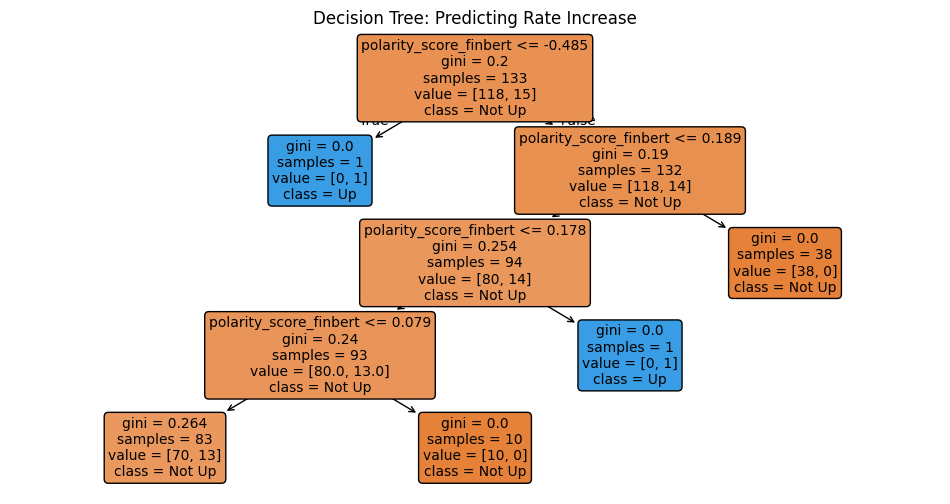

In [29]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(12, 6))  # Adjust size as needed
plot_tree(
    clf,
    feature_names=['polarity_score_finbert'],
    class_names=['Not Up', 'Up'],  # Adjust if you're using multiclass
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree: Predicting Rate Increase")
plt.show()

* It shows how the FinBERT polarity score is used to classify whether the Bank of England raised rates (Up) or not (Not Up) after a speech.

Each node (box) represents a decision rule based on polarity_score_finbert, with the following info:

gini: impurity (lower is purer; 0 means all one class)

samples: number of data points reaching the node

value = [not_up, up]: actual count of samples in each class

class: majority class at that node

A large portion of the data has polarity between -0.485 and 0.189, and those mostly led to no rate hikes.

🔸 All 'Up' Predictions Happen at Rare Nodes:
Only 3 nodes predict "Up" (value = [0, 1]):

These nodes have just 1 sample each.

This shows the model found very few cases where sentiment strongly aligned with a rate increase.
The tree learned that most sentiment scores, even positive ones, are not strong indicators of a rate hike.

Only rare, extreme sentiment patterns slightly correlate with rate increases.

The data is highly imbalanced, with most outcomes being "Not Up".